In [144]:
import matplotlib.pyplot as plt
import seaborn as sns
from HAT import Hypergraph
from HAT import draw
from HAT.HAT import multicorrelations
import numpy as np



In [145]:
import pandas as pd
path = "mouse_neurons.csv"
df = pd.read_csv(path)
df.columns = [i for i in range(df.shape[1])]
df = df.drop([0], axis=1).drop([0], axis=0)
df = df.apply(pd.to_numeric, errors='coerce')

In [146]:
#(a)-(c)
edge_list = []
percentile = 99.9
for mtype in ['Drezner', 'Wang', 'Taylor']: 
    for order in range(3, 6):
        strength, group = multicorrelations(df.values, order=order, mtype=mtype)
        thresh = np.percentile(strength, percentile) #I make the threshold by percentile since some hypergraphs were empty with a fixed threshold
        idxs = np.where(strength > thresh)[0]
        edge_list.append(group[idxs])

y_positions=[np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(16), np.int64(17), np.int64(18), np.int64(19), np.int64(20), np.int64(21), np.int64(22), np.int64(23), np.int64(24), np.int64(25), np.int64(26), np.int64(27), np.int64(28), np.int64(29), np.int64(30), np.int64(31), np.int64(32), np.int64(33), np.int64(34), np.int64(35), np.int64(36), np.int64(37), np.int64(38), np.int64(39), np.int64(40), np.int64(41), np.int64(42), np.int64(43), np.int64(44), np.int64(45), np.int64(46)]


<Axes: >

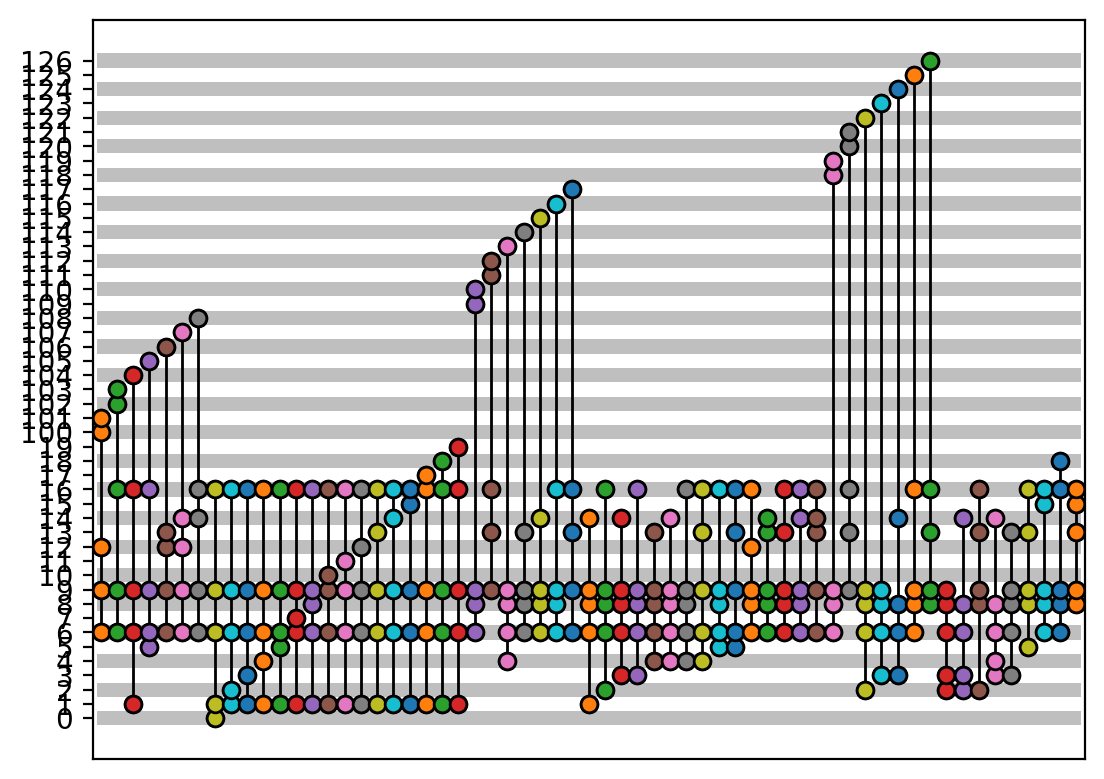

In [147]:
#Create non-uniform hypergraph by combining everything above.
all_edges = [edge for sublist in edge_list for edge in sublist] 

# My method to make uniform hypergraph
max_k = 5
newnodeinit = 100
for i in range(len(all_edges)):
    while len(all_edges[i]) < max_k:
        all_edges[i] = np.append(all_edges[i], newnodeinit)
        newnodeinit +=1

HG = Hypergraph(all_edges)
draw.incidence_plot(HG, node_labels = 'Names')

In [148]:
pd.DataFrame(all_edges)

,0,1,2,3,4
0,6,9,12,100,101
1,6,9,16,102,103
2,1,6,9,16,104
3,5,6,9,16,105
4,6,9,12,13,106
...,...,...,...,...,...
64,5,8,9,13,16
65,6,8,9,13,16
66,6,8,9,15,16
67,6,8,9,16,18
